# <center>Observation space rank histograms</center>

In [1]:
import numpy as np
from dartplot import obs

### Plot rank histogram of variable at a single time and vertical level
N.B. Lots of different style options

In [2]:
obs.plot_rank_hist?

Signature:
obs.plot_rank_hist(
    fname,
    vname,
    level=None,
    plevel=None,
    region=0,
    time=None,
    scale=False,
    style='bar',
    legend=False,
    color='turbo_r',
)
Docstring:
Used to plot rank histograms from DART filter diagnostics output

Inputs:
fname (str) --> name of obs_diag_output.nc file
vname (str) --> name of variable to be read
level (int or list of ints) pressure level to select by index(s)
plevel (int, str or list of ints/strs) pressure level to select by value(s)
region (int) --> index of region to select. defaults to 0 as we just have 1 region.
legend (boolean)--> if True plots a legend
time --> either (int) for selecting index, (np.datetime64) for selecting time
     --> can also be (list of ints) or (list of np.datetime64) to plot multiple times
         --> see create_time_list for list of times creation function
scale (boolean) --> option to scale counts by total count across all ranks
                --> a consistent value of 1 on the count

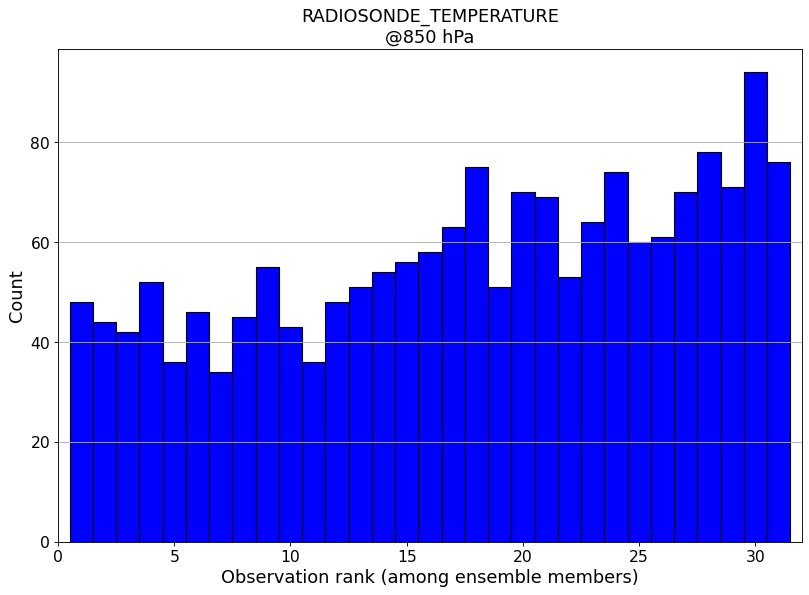

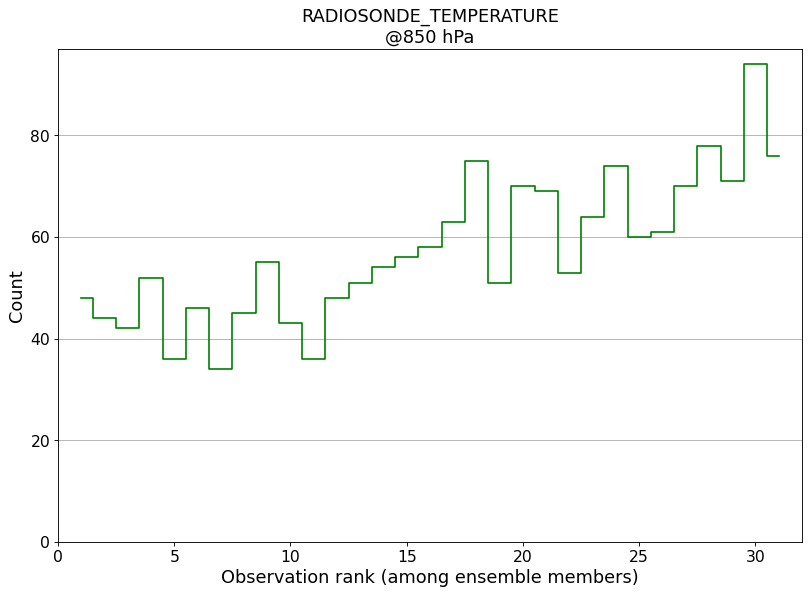

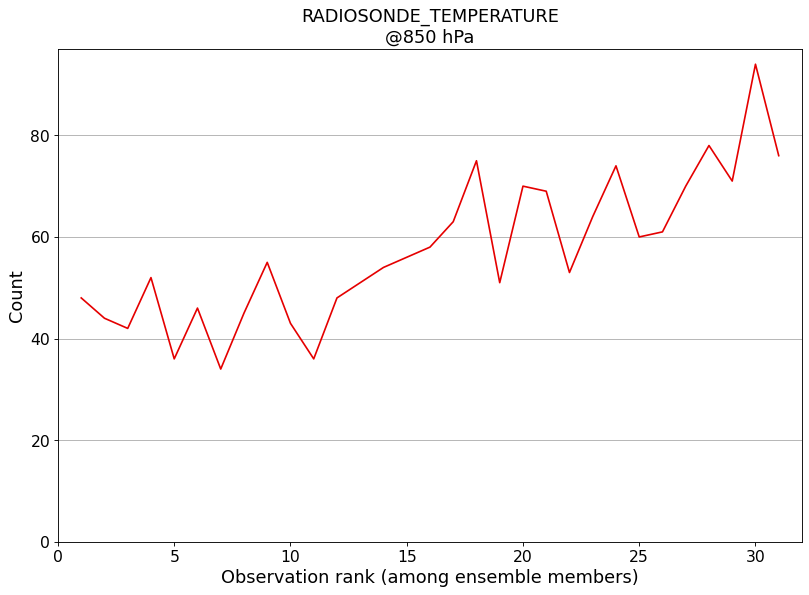

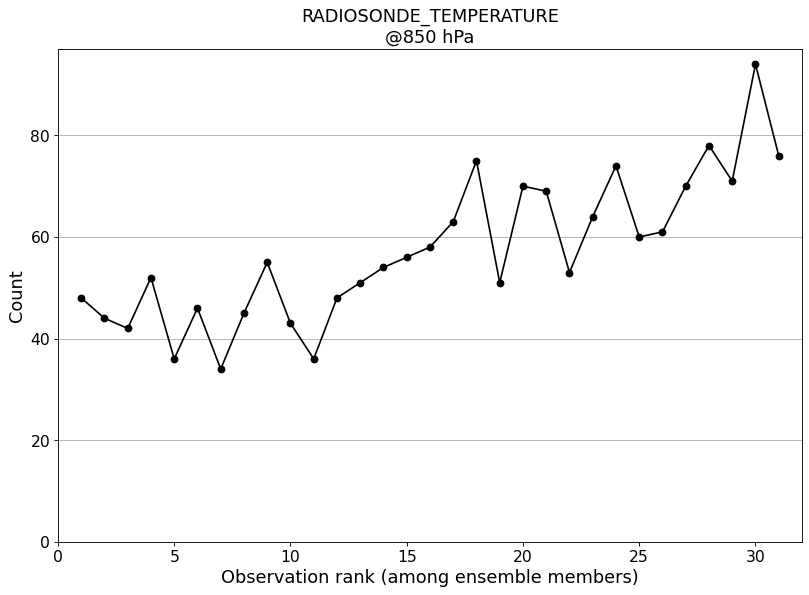

In [3]:
fname = 'obs_diag_output_example.nc'
vname = 'RADIOSONDE_TEMPERATURE_guess_RankHist'
plevel = 850
time = 4

fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="bar", color='b')
fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="step", color='green')
fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="line", color='xkcd:red')

timie = np.datetime64('2020-08-08T00')
fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="linedot", color=[0,0,0])

### Plot rank histogram at multiple times, vertical levels, or a combination of both
N.B. time can be selected with list of indices or list of np.datetime64\
N.B. likewise level can be selected with indices (level) or values (plevel)

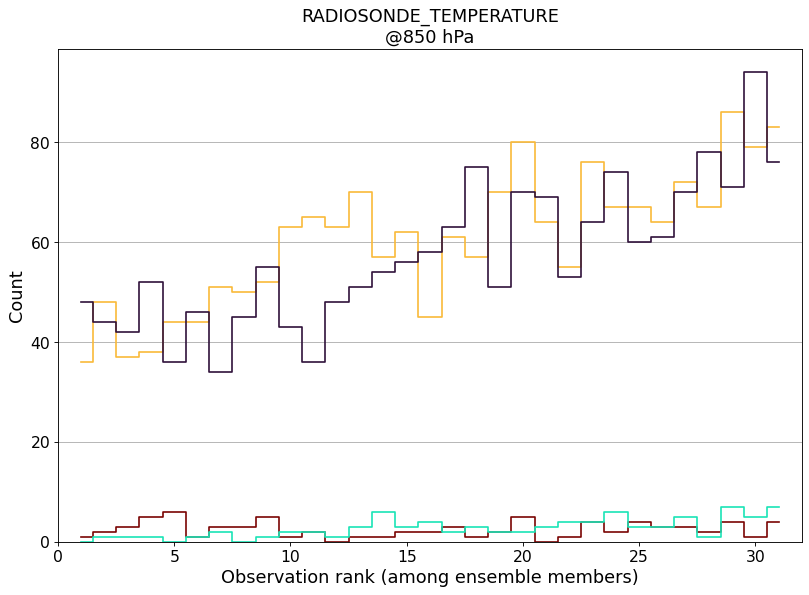

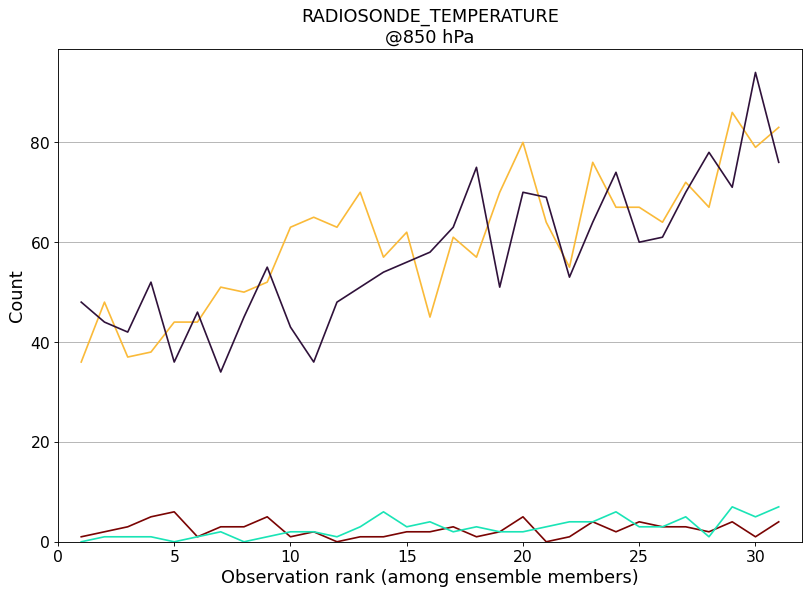

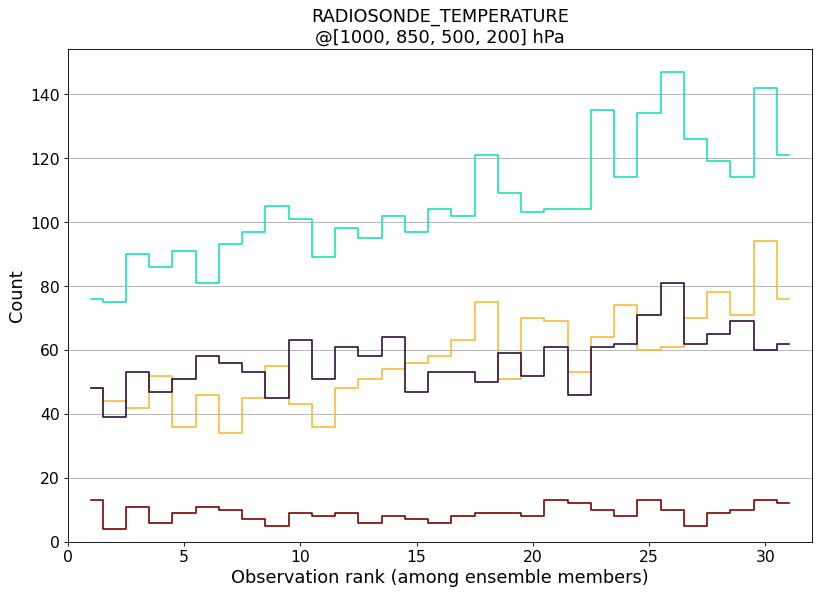

In [3]:
fname = 'obs_diag_output_example.nc'
vname = 'RADIOSONDE_TEMPERATURE_guess_RankHist'
plevel = 850
time = [1, 2, 3, 4]

fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="step")
fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="line")

plevel = [1000, 850, 500, 200]
time = 4

fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="step")

### More examples using ranges of times

In [5]:
obs.create_time_list?

Signature: obs.create_time_list(start_time, end_time, time_step_hrs)
Docstring:
Creates a list of np.datetime64 times which can be fed into rank histogram plots
Start and end times are incuded in range returned

Inputs:
start_time --> string with format YYYY-MM-DDTHH e.g. '2020-08-08T06'
end_time --> string with format YYYY-MM-DDTHH e.g. '2020-08-08T06'
time_step_hrs --> integer number of hours between elements in list e.g. 6

Returns:
time_list --> list of times in np.datetime64 format
File:      /glade/work/rclancy/ARCTIC_DA/analysis/diag_package/obs.py
Type:      function

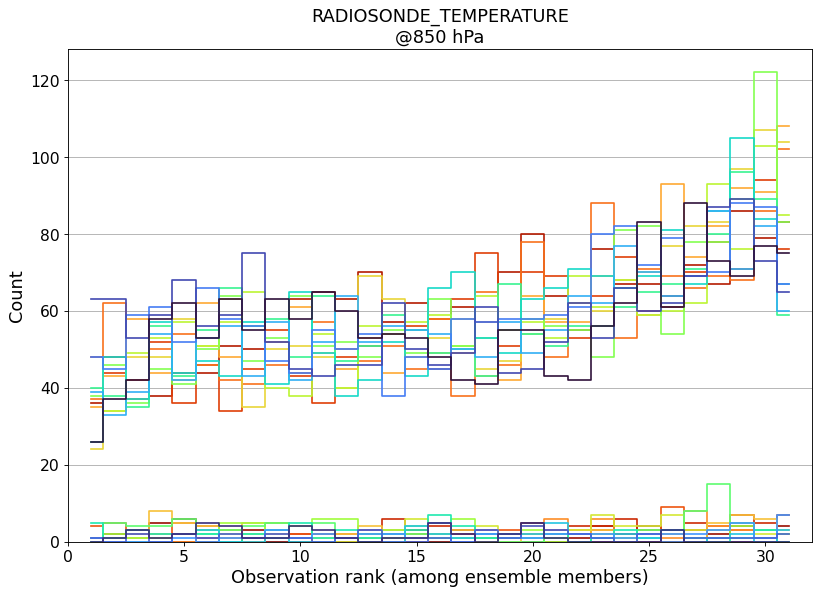

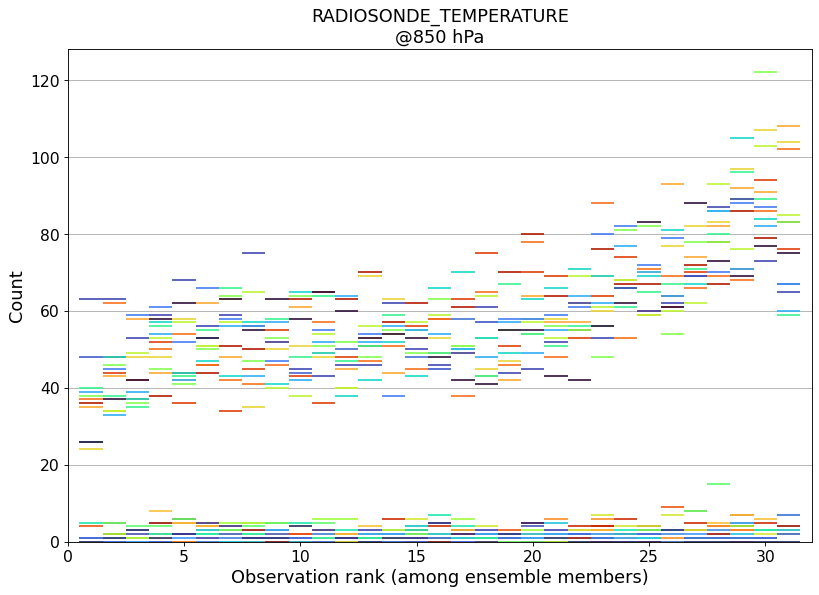

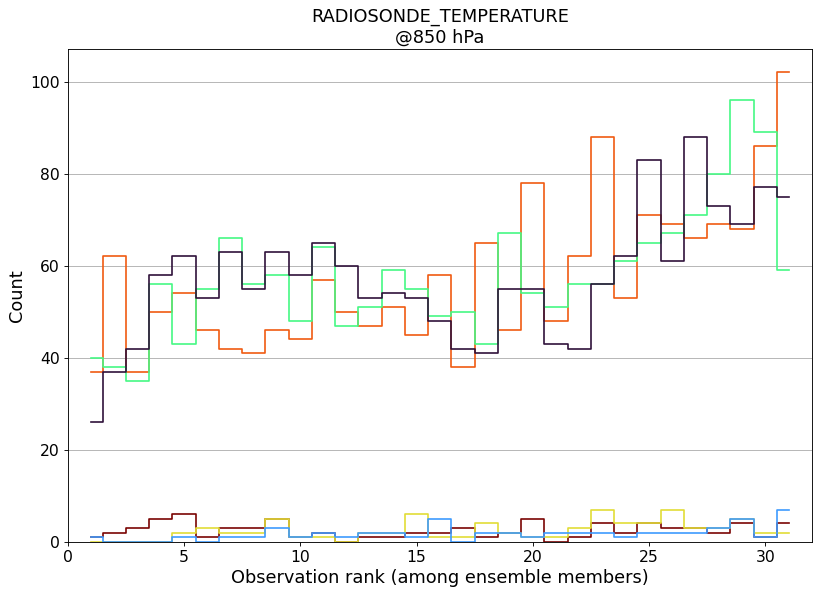

In [4]:
fname = 'obs_diag_output_example.nc'
vname = 'RADIOSONDE_TEMPERATURE_guess_RankHist'
plevel = 850
time = obs.create_time_list('2020-08-08T00', '2020-08-14T12', 6) #for selecting by time

fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="step")
fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="hlines")

time = list(range(1, 31, 5)) #for selecting by time index
fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, style="step")

### Examples of alternative marker usage and "scaling" of counts
Counts can be scaled by total number of observations at each time such that each bin
"should" have a count of 1 if observations are evenly distributed.\n
A scaled count of 2 would mean that the count is twice as high as it should be. Etc.

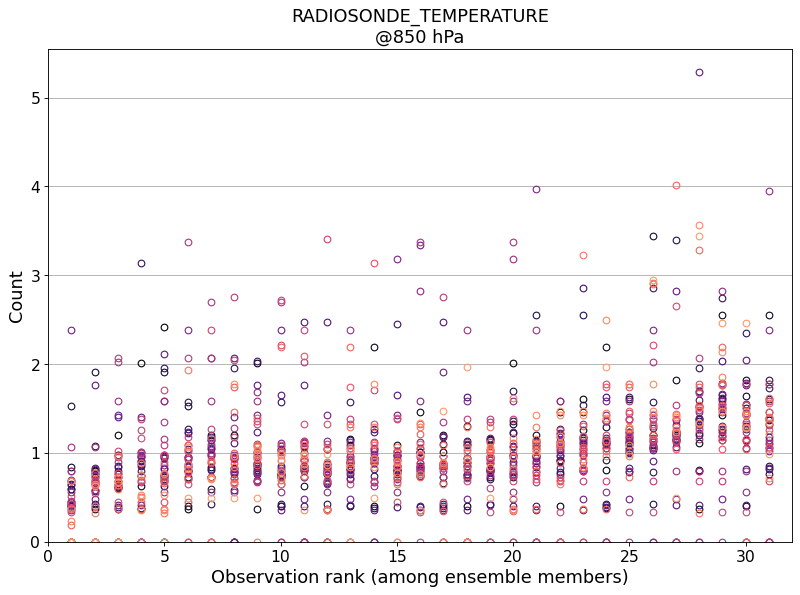

In [8]:
fname = 'obs_diag_output_example.nc'
vname = 'RADIOSONDE_TEMPERATURE_guess_RankHist'
plevel = 850
time = obs.create_time_list('2020-08-08T00', '2020-08-21T00', 6) #for selecting by time

fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, scale=True, style="o", color="magma")

# Box plots!
I think this is a nice alternative way to present multiple histograms at once.\
I've scaled this one as or example data has a bimodal distribution of observation numbers.

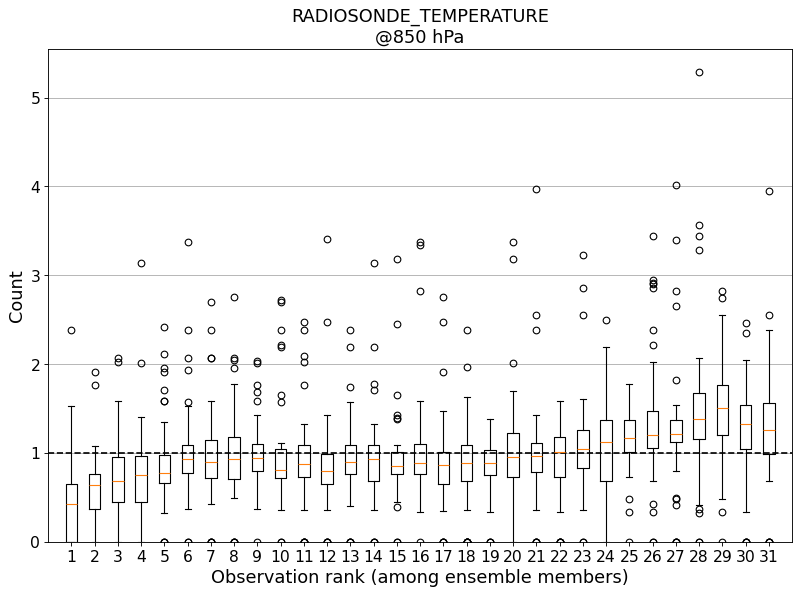

In [7]:
fname = 'obs_diag_output_example.nc'
vname = 'RADIOSONDE_TEMPERATURE_guess_RankHist'
plevel = 850
time = obs.create_time_list('2020-08-08T00', '2020-08-21T00', 6) #for selecting by time

fig, ax1 = obs.plot_rank_hist(fname, vname, plevel=plevel, time=time, scale=True, style="box", color='k')